## January 2020, BOS 311 Service Requests Analysis

#### The Mayor and his Cabinet have asked the Citywide Analytics Team to look into all cases submitted to BOS: 311 in January 2020 to understand current constituent concerns and performance trends across city departments. 

This is an analysis with observations and potential items for further analysis or action for the Mayor and the Analytics Team to take. Includes data visualizations (charts, tables, maps, etc.) that will help illustrate findings and recommendations.

#### Possible topics for analysis include:

* What general trends do you see in constituent engagement? 
* What services are people requesting? 
* What do you see at a neighborhood level? 
* City Operations: How long does it take to complete a request? 
* How many and what kind of cases were still open at the end of January? 
* What do you see at the departmental-level? 
* What are areas that the City should focus on and what areas has the City done well in?  
* How would you work with departments to improve City services? 
* Are there problems you see in the dataset that would pose challenges to future analyses? 
* How can the City use the information in this dataset—both within City Hall and with the public—to better connect with communities?

In [1]:
# Required libraries for the project
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime


#### Extract and format data to support the analysis

In [2]:
#Data set URL
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpt1d4qk7n.csv'
bdata = pd.read_csv(url, usecols = ['case_enquiry_id', 'open_dt', 'closed_dt', 'ontime', 'case_status', 'case_title',
                                    'subject', 'reason', 'type', 'queue', 'department', 'submittedphoto', 
                                    'closedphoto', 'fire_district', 'city_council_district', 'neighborhood',
                                    'neighborhood_services_district', 'ward', 'location_zipcode', 'source'], header = 0,
                    low_memory = True)

#Filling the NaN values in columns submittedphoto and closedphoto with False
bdata['submittedphoto'].fillna('False', inplace = True)
bdata['closedphoto'].fillna('False', inplace = True)

#Setting the image url to true, only to get the count of submissions
bdata.closedphoto.replace('^https:.*', 'True', regex = True, inplace = True)
bdata.submittedphoto.replace('^https:.*', 'True', regex = True, inplace = True)

#Removing Ward n from the column ward
bdata.ward.replace('^Ward ', '', regex = True, inplace = True)
bdata.ward.replace(' ', 0, inplace = True)
bdata['location_zipcode'].fillna('No Zip code', inplace = True)

#Restructure neighborhood_services_district column; this will be used with apriori()
bdata.neighborhood_services_district.replace(' ', 0, inplace = True)
bdata['neighborhood_services_district'].fillna(0, inplace = True)
bdata['neighborhood_services_district'] = bdata['neighborhood_services_district'].astype('int32')

### General trends in constituent engagement

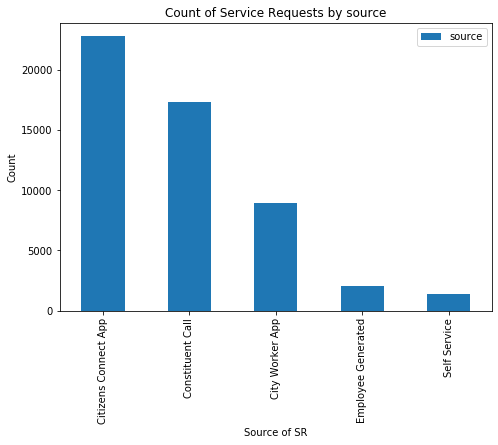

In [3]:
source = bdata['source'].value_counts()
source.cumsum()
source_plt = plt.figure() 
source_ax = source_plt.add_axes([0,0,1,1])
source.plot(kind = 'bar')
source_ax.set_title('Count of Service Requests by source')
source_ax.set_xlabel('Source of SR')
source_ax.set_ylabel('Count')
plt.legend(loc='best')
plt.show()

### What services are people requesting?

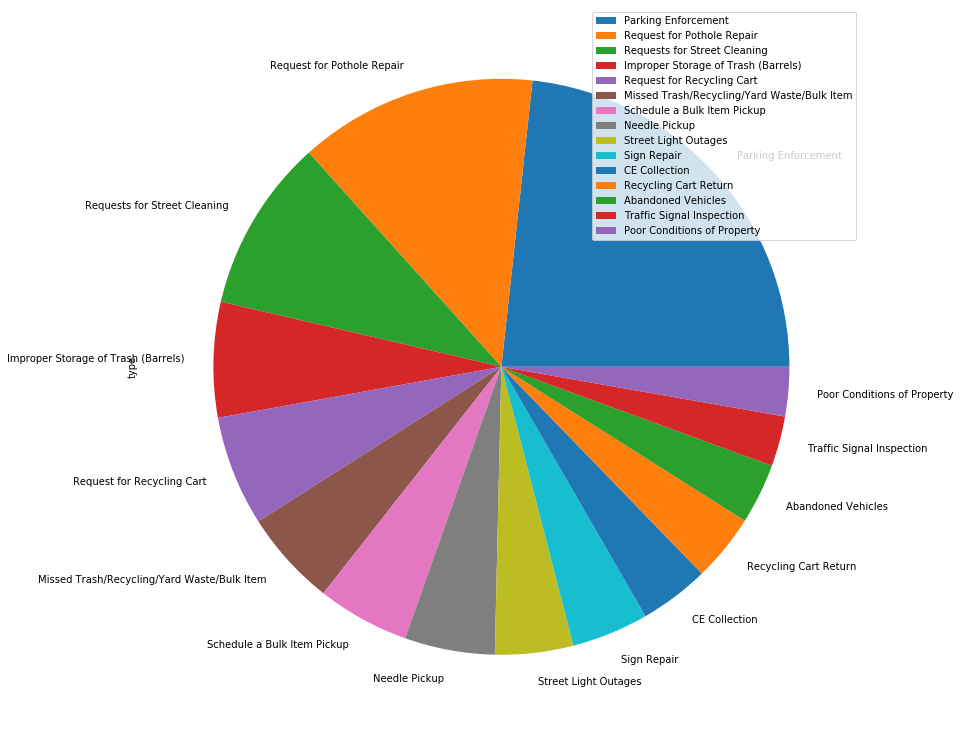

Top 15 Request types


Parking Enforcement                            8612
Request for Pothole Repair                     4951
Requests for Street Cleaning                   3595
Improper Storage of Trash (Barrels)            2393
Request for Recycling Cart                     2287
Missed Trash/Recycling/Yard Waste/Bulk Item    1990
Schedule a Bulk Item Pickup                    1918
Needle Pickup                                  1871
Street Light Outages                           1624
Sign Repair                                    1596
CE Collection                                  1448
Recycling Cart Return                          1397
Abandoned Vehicles                             1255
Traffic Signal Inspection                      1041
Poor Conditions of Property                    1024
Name: type, dtype: int64

In [4]:
types = bdata['type'].value_counts(sort = True, dropna = True)
types = types.iloc[:15]
types_plt = plt.figure(figsize = [10,10]) 
types_ax = types_plt.add_axes([0,0,1,1])
types.plot(kind = 'pie')
plt.legend(loc='best')
plt.show()
print('Top 15 Request types')
types

### What is at the Neighborhood level?

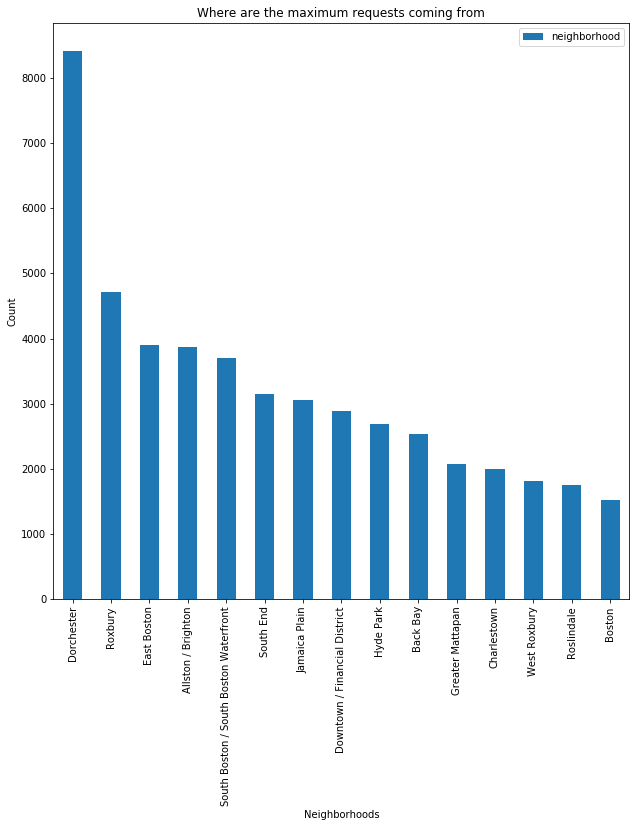

Top 15 Neighborhoods


Dorchester                                8418
Roxbury                                   4712
East Boston                               3895
Allston / Brighton                        3876
South Boston / South Boston Waterfront    3708
South End                                 3148
Jamaica Plain                             3061
Downtown / Financial District             2881
Hyde Park                                 2687
Back Bay                                  2542
Greater Mattapan                          2070
Charlestown                               2002
West Roxbury                              1807
Roslindale                                1754
Boston                                    1516
Name: neighborhood, dtype: int64

In [5]:
neighbor = bdata['neighborhood'].value_counts(sort = True, dropna = True)
neighbor = neighbor.iloc[:15]
neighbor_plt = plt.figure(figsize = [8,8]) 
neighbor_ax = neighbor_plt.add_axes([0,0,1,1])
neighbor.plot(kind = 'bar')
neighbor_ax.set_title('Where are the maximum requests coming from')
neighbor_ax.set_xlabel('Neighborhoods')
neighbor_ax.set_ylabel('Count')
plt.legend(loc='best')
plt.show()
print('Top 15 Neighborhoods')
neighbor

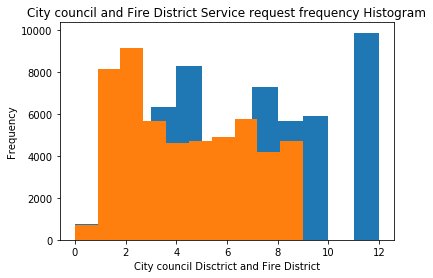

In [6]:
# Arguments required to build Histogram for fire district
bdata['fire_district'].fillna(0, inplace = True)
fire = bdata.fire_district.replace(' ', 0)
fire = fire.astype('int32')
plt.hist(fire, bins = 12)

# Arguments required to build Histogram for City council district
bdata['city_council_district'].fillna(0, inplace = True)
city = bdata.city_council_district.replace(' ', 0)
city = city.astype('int32')

# Histogram
plt.hist(city, bins = 10)
plt.xlabel('City council Disctrict and Fire District')
plt.ylabel('Frequency')
plt.title('City council and Fire District Service request frequency Histogram')
plt.show()

### How long does it take to complete a request?

In [7]:
bdata['open_dt'] = pd.to_datetime(bdata['open_dt'])
bdata['closed_dt'] = pd.to_datetime(bdata['closed_dt'])
bdata['res_days'] = (bdata['closed_dt'] - bdata['open_dt']).dt.days
bdata['res_days'].describe()

count    42364.000000
mean         2.137168
std          5.994808
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         75.000000
Name: res_days, dtype: float64

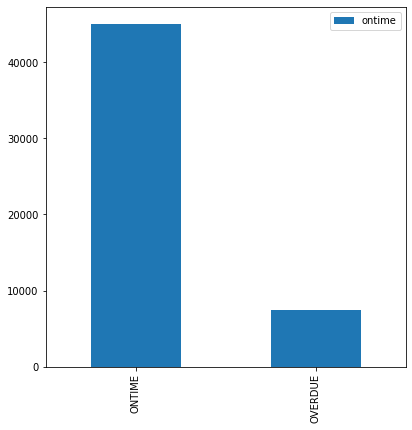

Resolution


ONTIME     45024
OVERDUE     7493
Name: ontime, dtype: int64

In [8]:
ontime = bdata['ontime'].value_counts(sort = True, dropna = True)
ontime_plt = plt.figure(figsize = [5,5]) 
ontime_ax = ontime_plt.add_axes([0,0,1,1])
ontime.plot(kind = 'bar')
plt.legend(loc='best')
plt.show()
print('Resolution')
ontime

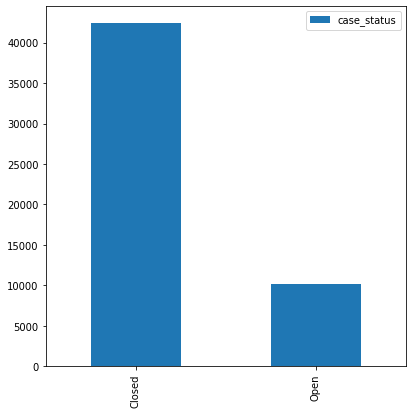

Service Request Status


Closed    42364
Open      10153
Name: case_status, dtype: int64

In [9]:
status = bdata['case_status'].value_counts(sort = True, dropna = True)
status_plt = plt.figure(figsize = [5,5]) 
status_ax = status_plt.add_axes([0,0,1,1])
status.plot(kind = 'bar')
plt.legend(loc='best')
plt.show()
print('Service Request Status')
status

## Association Analysis (Neighborhood level) using mlxtend

In [10]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Restructuring the columns

In [11]:
bdata['reason'] = bdata['reason'].str.strip()
bdata['department'] = bdata['department'].astype('str')
closeCase = (bdata[bdata['case_status'] == 'Closed'].groupby(['department', 'reason'])['neighborhood_services_district']
           .sum().unstack().reset_index().fillna(0).set_index('department'))


In [12]:
def cases(caseID):
    if caseID <= 0:
        return 0
    if caseID >= 1:
        return 1
    
closeCase_collection =  closeCase.applymap(cases)

frequent_cases = apriori(closeCase_collection, min_support = 0.01, use_colnames = True)


### What see at the departmental-level?

In [17]:
closeCase_collection

reason,Abandoned Bicycle,Administrative & General Requests,Air Pollution Control,Animal Issues,Boston Bikes,Building,Catchbasin,Cemetery,Code Enforcement,Employee & General Comments,...,Parking Complaints,Recycling,Sanitation,Sidewalk Cover / Manhole,Signs & Signals,Street Cleaning,Street Lights,Traffic Management & Engineering,Trees,Weights and Measures
department,,,,,,,,,,,,,,,,,,,,,
ANML,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BPS_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTDT,1,1,0,0,1,0,0,0,1,1,...,1,0,0,0,1,1,1,1,1,0
BWSC,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
DISB,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GEN_,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
INFO,0,1,1,1,0,0,0,0,1,1,...,0,0,1,0,1,1,1,1,1,0
ISD,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,1,0,0,0,1
PARK,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,1,0


In [46]:
frequent_cases = frequent_cases[frequent_cases['support'] >= 0.5]
frequent_cases

,support,itemsets
1,0.636364,(Administrative & General Requests)
7,0.545455,(Code Enforcement)
9,0.636364,(Enforcement & Abandoned Vehicles)
15,0.636364,(Highway Maintenance)
26,0.545455,(Signs & Signals)
27,0.545455,(Street Cleaning)
55,0.545455,"(Enforcement & Abandoned Vehicles, Administrat..."
60,0.545455,"(Administrative & General Requests, Highway Ma..."
70,0.545455,"(Signs & Signals, Administrative & General Req..."
147,0.545455,"(Code Enforcement, Street Cleaning)"


In [49]:
likely_conditions = association_rules(frequent_cases, metric = 'lift', min_threshold = 1)
likely_conditions.sort_values(by=['confidence'], ascending = False, inplace = True)
likely_conditions[(likely_conditions['lift'] >= 1) & (likely_conditions['confidence'] >= 0.7)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Signs & Signals),(Administrative & General Requests),0.545455,0.636364,0.545455,1.000000,1.571429,0.198347,inf
6,(Code Enforcement),(Street Cleaning),0.545455,0.545455,0.545455,1.000000,1.833333,0.247934,inf
7,(Street Cleaning),(Code Enforcement),0.545455,0.545455,0.545455,1.000000,1.833333,0.247934,inf
9,(Signs & Signals),(Enforcement & Abandoned Vehicles),0.545455,0.636364,0.545455,1.000000,1.571429,0.198347,inf
10,"(Enforcement & Abandoned Vehicles, Administrat...",(Signs & Signals),0.545455,0.545455,0.545455,1.000000,1.833333,0.247934,inf
11,"(Enforcement & Abandoned Vehicles, Signs & Sig...",(Administrative & General Requests),0.545455,0.636364,0.545455,1.000000,1.571429,0.198347,inf
12,"(Signs & Signals, Administrative & General Req...",(Enforcement & Abandoned Vehicles),0.545455,0.636364,0.545455,1.000000,1.571429,0.198347,inf
15,(Signs & Signals),"(Enforcement & Abandoned Vehicles, Administrat...",0.545455,0.545455,0.545455,1.000000,1.833333,0.247934,inf
0,(Enforcement & Abandoned Vehicles),(Administrative & General Requests),0.636364,0.636364,0.545455,0.857143,1.346939,0.140496,2.545455
1,(Administrative & General Requests),(Enforcement & Abandoned Vehicles),0.636364,0.636364,0.545455,0.857143,1.346939,0.140496,2.545455
